In [1]:
#importing tributaries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [2]:
#loading the daibeties dataset to a pandas Dataframe

df = pd.read_csv(r'C:\Users\USER\Documents\dataset\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Number of roles and column

df.shape

(768, 9)

In [20]:
#getting the statistical measure of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


since we have a wide range in our data, we need ro rescale it

<Axes: >

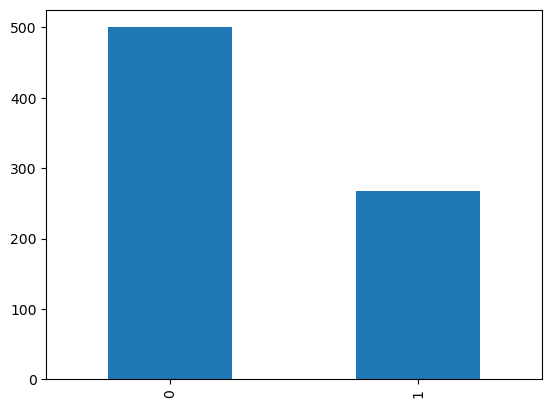

In [6]:
#checking if our data is balance
df["Outcome"].value_counts().plot(kind = "bar")

0 --> non diabetic
1 --> diabetic

In [7]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
#seperating the data and label
x = df.drop(columns = "Outcome", axis = 1)
y = df["Outcome"]

In [9]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Data Standardization

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(x)

StandardScaler()

In [12]:
standardized_data = scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [13]:
x = standardized_data


In [14]:
#Train test split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = 2)

Training the Model

In [15]:
classifier = svm.SVC(kernel ="linear")

In [16]:
#training the support vector machine Clasifier
classifier.fit(x_train, y_train)

SVC(kernel='linear')

Evaluation of model

In [17]:
# accuracy scorre on the trainiig data
x_train_prediction = classifier.predict(x_train)
training_data_accurracy = accuracy_score(x_train_prediction, y_train)

In [18]:
print("Accuracy Score of the training data :", training_data_accurracy)

Accuracy Score of the training data : 0.7866449511400652


In [19]:
x_test_prediction = classifier.predict(x_test)
test_accuracy_score = accuracy_score(x_test_prediction,y_test)

In [20]:
print("Accuracy Score of the test data :", test_accuracy_score)

Accuracy Score of the test data : 0.7727272727272727


Make a predictive system

In [22]:
input_data = (3,78,50,32,88,31,0.248,26)
#chage it to numpyarry
input_data = np.asarray(input_data)
#reshape the data for one instance
input_data = input_data.reshape(1,-1)

#note since we used standardized data, we must standardize the input

std_data = scaler.transform(input_data)

prediction = classifier.predict(std_data)
print(prediction)

[0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
